In [9]:
# necessary imports
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid", palette="muted")


In [10]:
# define data path
base_path = os.path.dirname(os.getcwd())
base_path = os.path.join(base_path, "data/describable_textures_dtd")
meta_data = "data.csv"
# load data
df = pd.read_csv(os.path.join(base_path, meta_data))


In [11]:
# set a random seed for reproducibility
seed = 49
rnd_state = np.random.RandomState(seed=seed)
class_names = df.class_name.unique().tolist()


In [12]:
# use PRNG to generate weights for each class
weights = rnd_state.rand(len(class_names))
num_orig_samples = df.class_name.value_counts().values

# total number of samples after resampling
total_num_samples = weights.dot(num_orig_samples).astype("int")


In [13]:
# dictionary containing weights for each class
class_weights = dict(zip(class_names, weights))


In [14]:
# create a new dataframe with unbalanced data
unbalanced_df = df.sample(
    n=total_num_samples, weights=df.class_name.map(class_weights), replace=False
)
unbalanced_df


,class_name,class_id,file_name
4008,scaly,33,scaly_0154.jpg
3907,potholed,32,potholed_0161.jpg
786,cobwebbed,6,cobwebbed_0079.jpg
813,cobwebbed,6,cobwebbed_0113.jpg
4134,smeared,34,smeared_0123.jpg
...,...,...,...
1081,crystalline,9,crystalline_0138.jpg
1377,fibrous,11,fibrous_0112.jpg
1760,frilly,14,frilly_0080.jpg
1005,crosshatched,8,crosshatched_0083.jpg


47


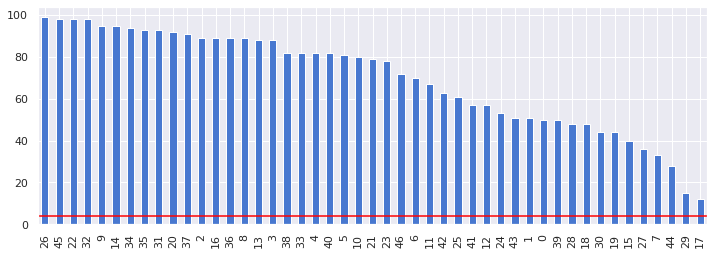

In [15]:
# inspect class labels after resampling
print(unbalanced_df.class_id.nunique())
unbalanced_df.class_id.value_counts().plot(figsize=(12, 4), kind="bar")
plt.axhline(y=4, color="red")
plt.show()

In [16]:
# save the dataframe to a CSV file
unbalanced_df.to_csv(
    os.path.join(base_path, "unbalanced_data.csv"), index=False
)
